# California Housing Price Prediction
>## Business Problem:

To predict the prices of houses in Californa based on their different specifications and locations
>## Description :

The Dataset is built using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

The information was collected on the variables using all the block groups in California from the 1990 Census. In this sample a block group on average includes 1425.5 individuals living in a geographically compact area. Naturally, the geographical area included varies inversely with the population density. Distances were computed among the centroids of each block group as measured in latitude and longitude and all the districts reporting zero entries for the independent and dependent variables were excluded. The final data contained 20,640 observations on 9 variables. The dependent variable is ln(median house value). The other variables are as follows:

1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housing_Median_Age: Median age of a house within a block; a lower number is a newer building
4. total_Rooms: Total number of rooms within a block
5. total_Bedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. median_Income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. median_House_Value: Median house value for households within a block (measured in US Dollars)
10. ocean_Proximity: Location of the house w.r.t ocean/sea



- #### Data Description

In [1]:
#importing Libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing=pd.read_csv(r'C:\Users\$ubhajit\Documents\housing.csv')

In [3]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [4]:
housing.shape

(20640, 10)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- Total observations: 20,640 (Each observation is the data about a block group)
- Total columns (features): 10
- Data type of each feature: 9 numberical(float) and 1 object
- Features with null values : 1, total_bedrooms

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [8]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


- ## Exploratory Data Analysis

### Uni-variate Analysis

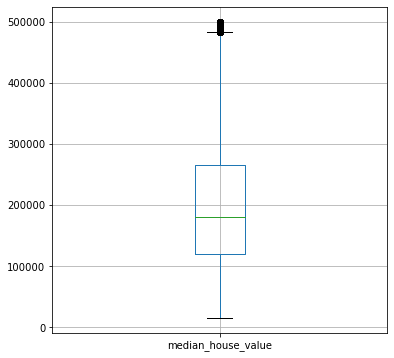

In [9]:
housing.boxplot('median_house_value' , figsize=(6,6))

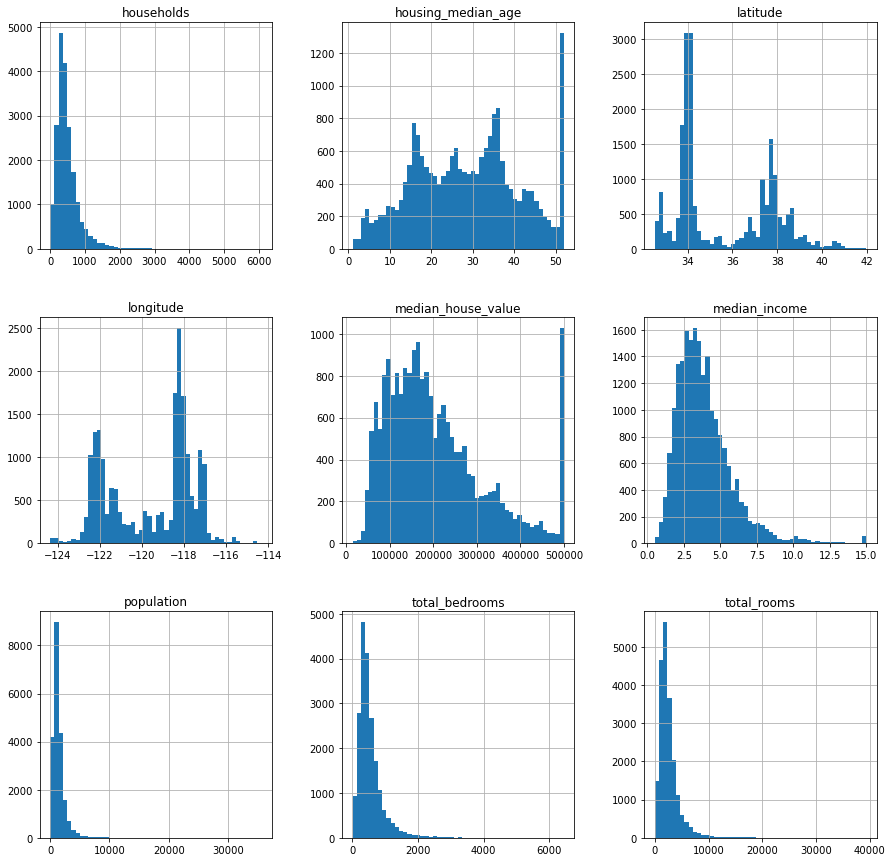

In [10]:
housing.hist(bins=50,figsize=(15,15))
plt.show()

In [11]:
op_count=housing.ocean_proximity.value_counts()

In [12]:
op_count

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

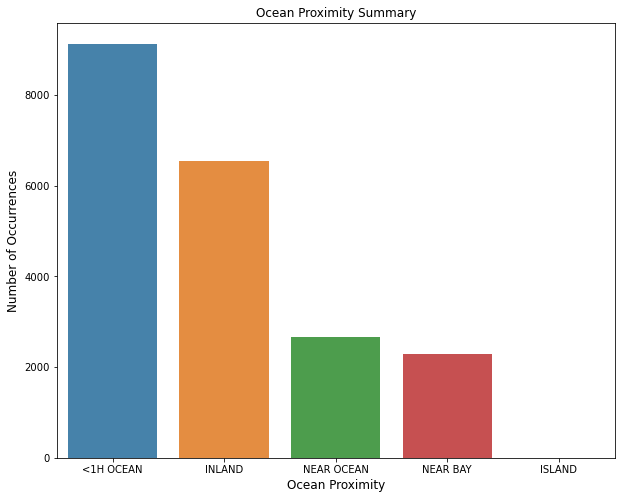

In [13]:
plt.figure(figsize=(10,8))
sns.barplot(op_count.index, op_count.values, alpha=0.9)
plt.title('Ocean Proximity Summary')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Ocean Proximity', fontsize=12)
plt.show()

## Correlation Analysis

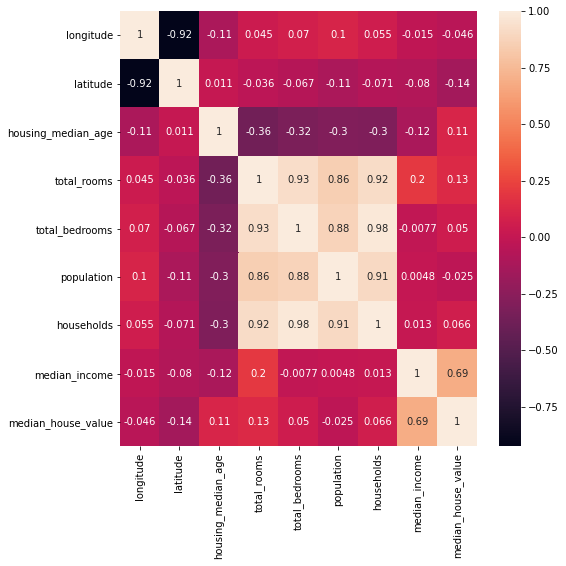

In [14]:
plt.subplots(figsize=(8,8))
sns.heatmap(housing.corr(),annot=True)

## Bi-Variate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000228378CD978>,
      dtype=object)

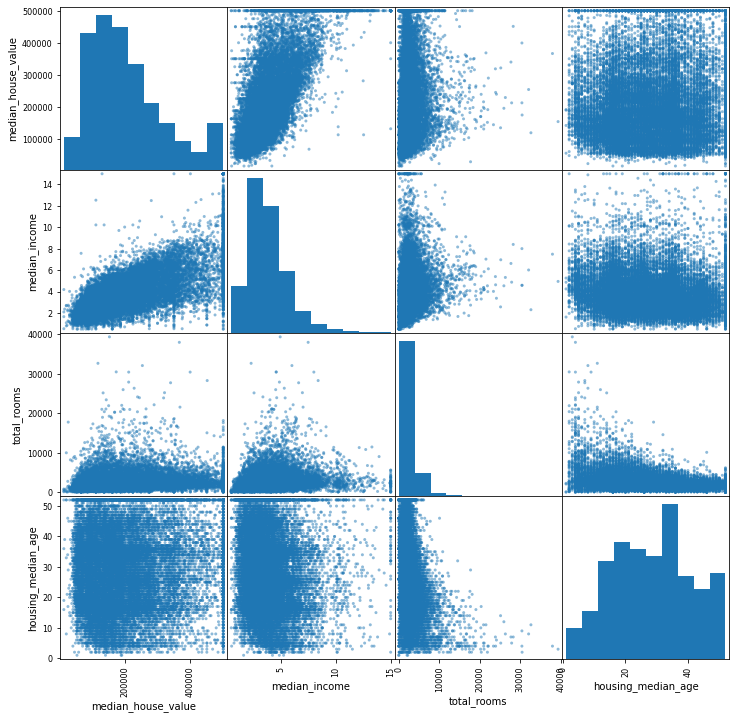

In [15]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,12))

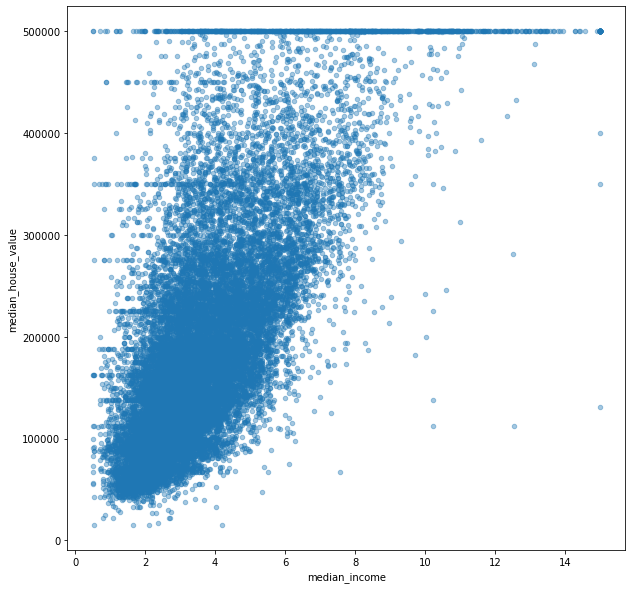

In [16]:
housing.plot(kind='scatter' , x='median_income' , y='median_house_value' , alpha=0.4 , figsize=(10,10))

In [17]:
dup_val=housing.median_house_value.value_counts()
housing.median_house_value=housing.median_house_value.apply(lambda x : np.nan if dup_val[x]>20 else x)
housing.dropna(subset=['median_house_value'],inplace=True)


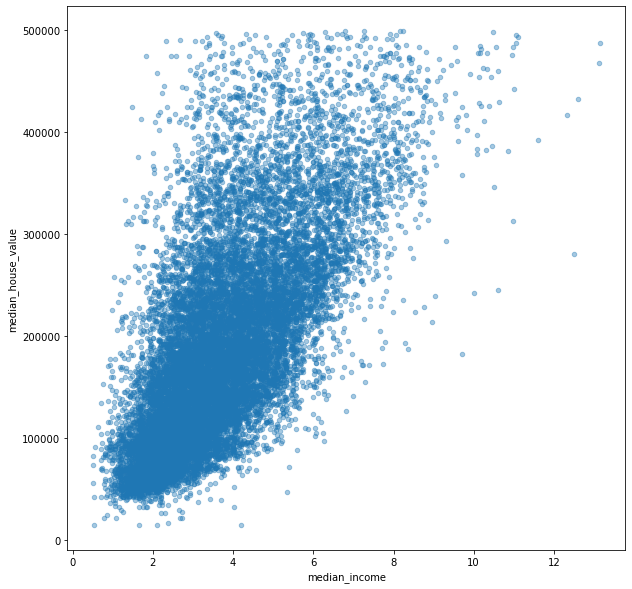

In [18]:
housing.plot(kind='scatter' , x='median_income' , y='median_house_value' , alpha=0.4, figsize=(10,10))

## Multi-Variate Analysis

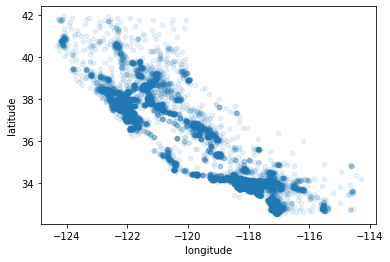

In [19]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

### It looks like the map of California

<img src="california map.jpg"/>

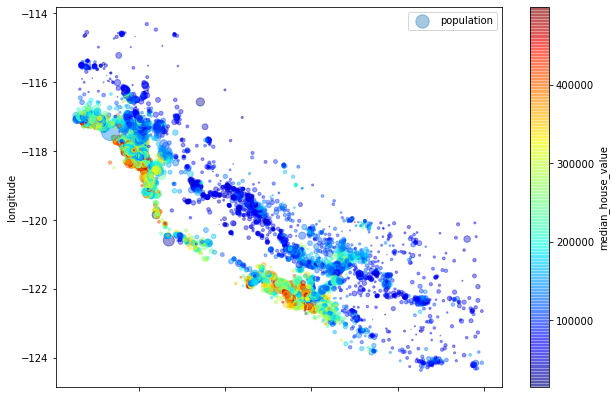

In [20]:
housing.plot(kind='scatter' , x='latitude', y='longitude', alpha=0.4, 
    s=housing["population"]/100, label='population', figsize=(10,7), 
    c='median_house_value' , cmap=plt.get_cmap('jet'), colorbar=True)

In [21]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [22]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.923948,-0.097639,0.044240,0.067764,0.101906,0.053206,-0.003519,-0.045445,-0.028390,0.099137,0.140168
latitude,-0.923948,1.000000,0.000846,-0.032483,-0.061960,-0.112221,-0.066684,-0.093951,-0.155578,0.114822,-0.120900,-0.140980
housing_median_age,-0.097639,0.000846,1.000000,-0.388281,-0.345879,-0.319439,-0.329018,-0.203266,0.062399,-0.211909,0.169915,-0.010395
total_rooms,0.044240,-0.032483,-0.388281,1.000000,0.939230,0.866596,0.925598,0.216755,0.145302,0.175208,-0.175554,-0.091636
total_bedrooms,0.067764,-0.061960,-0.345879,0.939230,1.000000,0.884818,0.978465,0.017252,0.068873,0.027685,0.094643,-0.115441
population,0.101906,-0.112221,-0.319439,0.866596,0.884818,1.000000,0.915160,0.037673,0.007062,-0.069965,0.052256,0.173325
households,0.053206,-0.066684,-0.329018,0.925598,0.978465,0.915160,1.000000,0.043202,0.089654,-0.073513,0.075503,-0.101482
median_income,-0.003519,-0.093951,-0.203266,0.216755,0.017252,0.037673,0.043202,1.000000,0.680079,0.377170,-0.675531,-0.046886
median_house_value,-0.045445,-0.155578,0.062399,0.145302,0.068873,0.007062,0.089654,0.680079,1.000000,0.153992,-0.280018,-0.194984
rooms_per_household,-0.028390,0.114822,-0.211909,0.175208,0.027685,-0.069965,-0.073513,0.377170,0.153992,1.000000,-0.507826,-0.060235


In [23]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.680079
rooms_per_household         0.153992
total_rooms                 0.145302
households                  0.089654
total_bedrooms              0.068873
housing_median_age          0.062399
population                  0.007062
longitude                  -0.045445
latitude                   -0.155578
population_per_household   -0.194984
bedrooms_per_room          -0.280018
Name: median_house_value, dtype: float64

In [24]:
ocean_cat=pd.get_dummies(housing.ocean_proximity)
housing[ocean_cat.columns]=ocean_cat
housing.drop('ocean_proximity' ,axis=1,inplace=True)

In [25]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17690 entries, 0 to 20639
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 17690 non-null  float64
 1   latitude                  17690 non-null  float64
 2   housing_median_age        17690 non-null  float64
 3   total_rooms               17690 non-null  float64
 4   total_bedrooms            17506 non-null  float64
 5   population                17690 non-null  float64
 6   households                17690 non-null  float64
 7   median_income             17690 non-null  float64
 8   median_house_value        17690 non-null  float64
 9   rooms_per_household       17690 non-null  float64
 10  bedrooms_per_room         17506 non-null  float64
 11  population_per_household  17690 non-null  float64
 12  <1H OCEAN                 17690 non-null  uint8  
 13  INLAND                    17690 non-null  uint8  
 14  ISLAND

In [26]:
housing.fillna(housing.mean(),inplace=True)
housing.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17690 entries, 0 to 20639
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 17690 non-null  float64
 1   latitude                  17690 non-null  float64
 2   housing_median_age        17690 non-null  float64
 3   total_rooms               17690 non-null  float64
 4   total_bedrooms            17690 non-null  float64
 5   population                17690 non-null  float64
 6   households                17690 non-null  float64
 7   median_income             17690 non-null  float64
 8   median_house_value        17690 non-null  float64
 9   rooms_per_household       17690 non-null  float64
 10  bedrooms_per_room         17690 non-null  float64
 11  population_per_household  17690 non-null  float64
 12  <1H OCEAN                 17690 non-null  uint8  
 13  INLAND                    17690 non-null  uint8  
 14  ISLAND

In [27]:
housing['income_cat'] = np.ceil(housing['median_income']/1.5)


In [28]:
housing['income_cat'].where(housing['income_cat']<5, other=5.0, inplace=True)

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,0,0,0,1,0,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,0,0,0,1,0,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,0,0,0,1,0,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,0,0,0,1,0,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,0,0,0,1,0,3.0


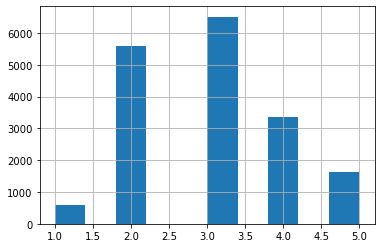

In [29]:
housing['income_cat'].hist()

In [30]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.iloc[train_index]
    strat_test_set = housing.iloc[test_index]

In [31]:
strat_test_set.head(10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_cat
17752,-121.83,37.32,21.0,4559.0,1163.000000,5124.0,1124.0,3.2052,179000.0,4.056050,0.255100,4.558719,1,0,0,0,0,3.0
17515,-121.93,37.33,44.0,1449.0,291.000000,676.0,282.0,3.5750,292200.0,5.138298,0.200828,2.397163,1,0,0,0,0,3.0
15406,-117.23,33.23,13.0,2899.0,657.000000,1946.0,579.0,2.9875,172000.0,5.006908,0.226630,3.360967,1,0,0,0,0,2.0
4738,-118.38,34.05,49.0,702.0,551.805552,458.0,187.0,4.8958,333600.0,3.754011,0.209222,2.449198,1,0,0,0,0,4.0
16487,-121.09,38.19,23.0,762.0,140.000000,358.0,141.0,2.4545,105000.0,5.404255,0.183727,2.539007,0,1,0,0,0,2.0
6697,-118.11,34.14,52.0,2401.0,332.000000,810.0,308.0,6.0948,358700.0,7.795455,0.138276,2.629870,1,0,0,0,0,5.0
11671,-118.01,33.84,35.0,4166.0,713.000000,2354.0,709.0,5.1775,213400.0,5.875882,0.171147,3.320169,1,0,0,0,0,4.0
1533,-122.05,37.90,32.0,2676.0,484.000000,986.0,473.0,4.6528,335700.0,5.657505,0.180867,2.084567,0,0,0,1,0,4.0
833,-122.02,37.60,32.0,1295.0,280.000000,1156.0,300.0,3.5000,154300.0,4.316667,0.216216,3.853333,0,0,0,1,0,3.0
19293,-122.83,38.40,37.0,2217.0,451.000000,1019.0,428.0,3.1217,178500.0,5.179907,0.203428,2.380841,1,0,0,0,0,3.0


In [32]:

housing['income_cat'].value_counts() / len(housing)

3.0    0.368231
2.0    0.315546
4.0    0.189994
5.0    0.092708
1.0    0.033522
Name: income_cat, dtype: float64

In [33]:

strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3.0    0.368287
2.0    0.315432
4.0    0.189938
5.0    0.092708
1.0    0.033635
Name: income_cat, dtype: float64

In [34]:
#experimenting: with random sampling
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
test_set['income_cat'].value_counts() / len(test_set)

3.0    0.362917
2.0    0.311193
4.0    0.193047
5.0    0.098643
1.0    0.034200
Name: income_cat, dtype: float64

In [35]:
# drop the income_cat attributes
for items in (strat_train_set, strat_test_set):
    items.drop("income_cat", axis=1, inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Create training and validation sets

In [36]:
y=strat_train_set.median_house_value
X=strat_train_set.drop('median_house_value' ,axis=1)

In [37]:
from sklearn.model_selection import train_test_split
X_train , X_val ,y_train ,y_val = train_test_split(X,y,test_size=0.2 ,random_state=42)

### Linear Regression :

In [38]:
for i in (X_train, X_val, y_train, y_val) : 
    i.dropna(inplace=True)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lreg = LinearRegression()
lreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
lreg.intercept_

-2190975.10670959

In [42]:
lreg.coef_

array([-2.46288780e+04, -2.26272730e+04,  1.04036212e+03, -1.04589892e+00,
       -1.01078732e+00, -2.51159359e+01,  9.49306747e+01,  4.36047410e+04,
        4.15109267e+03,  3.37640280e+05, -5.91172895e+03, -2.01318113e+04,
       -5.25988063e+04,  1.15130417e+05, -2.89945834e+04, -1.34052160e+04])

In [43]:
from sklearn.metrics import mean_squared_error
y_pred = lreg.predict(X_train)
lin_mse = mean_squared_error(y_train,y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

56981.23548010764

In [44]:
from sklearn.metrics import *
r2_score(y_train,lreg.predict(X_train))

0.661719292679867

In [45]:
y_train.describe()

count     11321.000000
mean     193433.141772
std       97974.358430
min       14999.000000
25%      116700.000000
50%      176000.000000
75%      251900.000000
max      499000.000000
Name: median_house_value, dtype: float64